In [1]:
!pip install xgboost
!pip install nltk
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn==1.0.2
!pip install scipy
!pip install lightgbm
!pip install hyperopt
# !pip install surprise

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import random, re, time, xgboost, glob, os, nltk, string
import numpy as np
from numpy.linalg import svd
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
# from matplotlib import rc
# rc('font', family='Malgun Gothic')      #한글 폰트설정
# plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from scipy import stats, sparse
from scipy.stats import t, norm, chi2, chi2_contingency, skew
from sklearn.datasets import load_iris, make_classification, load_breast_cancer, load_boston, make_blobs, fetch_20newsgroups
from sklearn import datasets, tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Binarizer, PolynomialFeatures

from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, confusion_matrix, f1_score, classification_report,\
    precision_recall_curve, roc_auc_score, mean_squared_error, r2_score,\
    mean_absolute_error, silhouette_samples, silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, \
    GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import plot_importance, XGBClassifier, XGBRegressor

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

# from surprise import SVD, Dataset, accuracy
# from surprise.model_selection import train_test_split

from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, imdb, reuters
from tensorflow.keras.utils import to_categorical


### **신경망의 구조: 핵심 Keras API 이해하기**

**TensorFlow 2.0부터는 Keras가 TensorFlow의 공식 API로 통합**

## **TensorFlow를 사용하여 Keras 모델을 구성하는 방법**

- ### **Sequential 모델**
Sequential 모델은 Keras에서 제공하는 가장 간단한 모델 구성 방법. Sequential 모델은 레이어를 순차적으로 쌓아 나가는 방식으로 모델을 구성. 각 레이어는 이전 레이어의 출력을 입력으로 받는다.하나의 입력과 하나의 출력을 가지는 단일 흐름의 모델을 만들기에 적합
- TensorFlow와 Keras 가져오기:
- Sequential 모델 생성:
Sequential 모델은 레이어를 선형으로 쌓아서 만드는 가장 간단한 모델입니다.
- 레이어 추가:
모델에 레이어를 추가하여 모델의 구조를 정의합니다. Keras에서는 다양한 유형의 레이어를 제공합니다. 예를 들어, Dense(완전 연결 레이어), Conv2D(2D 컨볼루션 레이어), LSTM(장기 단기 메모리 레이어) 등이 있습니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
- 모델 예측:
- 모델 저장 및 로드:

In [3]:
# Sequential 방식
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(input_dim,)))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

NameError: ignored

- ### **Functional API**

Functional API는 복잡한 모델 구조를 지원하며, 다양한 연결 및 분기 구조를 갖는 네트워크를 생성하는 데 유용

- TensorFlow와 필요한 모듈 가져오기:
- 입력 레이어 정의:
모델의 입력 레이어를 정의합니다.
- 레이어 구성:
다양한 레이어를 사용하여 모델의 구조를 정의합니다. 각 레이어는 이전 레이어의 출력을 입력으로 받습니다.
- 모델 생성:
입력과 출력을 지정하여 모델을 생성합니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
훈련 데이터를 사용하여 모델을 학습시킵니다. 입력 데이터와 해당 출력 데이터를 제공해야 합니다.
- 모델 예측:
- 모델 저장 및 로드:

In [ ]:
# 함수 방식
inputs = keras.Input(shape=(input_dim,))

x = keras.layers.Dense(units=64, activation='relu')(inputs)
x = keras.layers.Dense(units=32, activation='relu')(x)
outputs = keras.layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

### **영화 리뷰 데이터셋: IMDB 데이터셋**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 등장 빈도가 높은 상위 10000개의 단어로만 데이터셋 구성(나머지 단어들은 아예 빼버림)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
print(train_data.shape)
print(len(train_data[0]))   #리뷰 0번의 길이(단어 개수)
print(train_data[0])    #단어의 인덱스 번호들(사전에 정의된 고유한 인덱스, 단어코드 같은 것)
print(np.max(train_data[0]))
print(train_labels[0])

(25000,)
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
7486
1


In [6]:
# sequence의 최대값들을 입력으로 갖는 리스트에서 최대값
max(max(s) for s in train_data)   # 모든 리뷰에서 가장 큰 단어 인덱스 번호

9999

## **신경망 모델 만들기**

### **모델 정의하기**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

# sigmoid: 0~1 사이 연속적인 값을 출력 (이진분류에서 사용/ 해당 클래스에 대한 확률 or 이진 분류 결과 출력)
# softmax: 다중 클래스 분류에서 각 클래스에 대한 확률 분포 벡터 출력 (값을 전부 더하면 1이 되도록 정규화 됨)

### **모델 컴파일 하기**

In [8]:
model.compile(optimizer='rmsprop',   #경사하강법의 일종, 최적화 알고리즘
              loss='binary_crossentropy',   #이진분류에서 주로 사용되는 손실함수
              metrics=['accuracy']
)

### **데이터 준비**
- **정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [9]:
results = np.zeros((len(train_data), 10000))
for i, sequence in enumerate(train_data[0]):
  print(i, sequence)

0 1
1 14
2 22
3 16
4 43
5 530
6 973
7 1622
8 1385
9 65
10 458
11 4468
12 66
13 3941
14 4
15 173
16 36
17 256
18 5
19 25
20 100
21 43
22 838
23 112
24 50
25 670
26 2
27 9
28 35
29 480
30 284
31 5
32 150
33 4
34 172
35 112
36 167
37 2
38 336
39 385
40 39
41 4
42 172
43 4536
44 1111
45 17
46 546
47 38
48 13
49 447
50 4
51 192
52 50
53 16
54 6
55 147
56 2025
57 19
58 14
59 22
60 4
61 1920
62 4613
63 469
64 4
65 22
66 71
67 87
68 12
69 16
70 43
71 530
72 38
73 76
74 15
75 13
76 1247
77 4
78 22
79 17
80 515
81 17
82 12
83 16
84 626
85 18
86 2
87 5
88 62
89 386
90 12
91 8
92 316
93 8
94 106
95 5
96 4
97 2223
98 5244
99 16
100 480
101 66
102 3785
103 33
104 4
105 130
106 12
107 16
108 38
109 619
110 5
111 25
112 124
113 51
114 36
115 135
116 48
117 25
118 1415
119 33
120 6
121 22
122 12
123 215
124 28
125 77
126 52
127 5
128 14
129 407
130 16
131 82
132 2
133 8
134 4
135 107
136 117
137 5952
138 15
139 256
140 4
141 2
142 7
143 3766
144 5
145 723
146 36
147 71
148 43
149 530
150 476
151 26
152

In [10]:
# i는 현재 시퀀스의 인덱스, j는 시퀀스 내의 정수
# 각 리뷰에서 등장하는 단어의 인덱스 위치에 해당하는 열을 1로 만든다
def vectorize_sequences(sequences, dimension=10000):   #시퀀스, 차원
  results = np.zeros((len(sequences), dimension))   #초기화

  for i, sequence in enumerate(sequences):   #train_data가 순서대로 들어감
    for j in sequence:   #한 리뷰에 있는 단어들의 고유 인덱스 번호
      results[i,j] = 1.  #각 리뷰별로, 각 단어가 존재하면 해당 위치 값 1 -> 원핫 인코딩 하는 거임
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]   #각 단어 고유 인덱스 번호들 -> 해당 단어가 존재하면 1, 아니면 0

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
np.sum(x_train[0])

120.0

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# 일반적으로 모델의 출력 레이어에 사용되는 활성화 함수들이 소수값을 다루기 때문에 바꿔줌

### **훈련검증**

- **검증 세트 준비하기**

In [14]:
x_val = x_train[:10000]   #전체 25000개 데이터 중 10000개를 검증데이터로 사용
y_val = y_train[:10000]
partial_x_train = x_train[10000:]   #나머지(15000개)를 학습데이터로 사용
partial_y_train = y_train[10000:]

# 이중 검증
# 1차: partial_train, val셋
# 2차: train, test셋

- **모델 훈련하기**

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)    #verbose=0: 학습과정 출력 안 보이게 숨기는 거

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### **훈련/검증 손실 그리기**

In [17]:
def graf(values, val_values, color):
  tr = history_dict[values]
  val = history_dict[val_values]
  epochs = range(1, len(tr)+1)

  plt.plot(epochs, tr, color+'o', label='Training '+values)
  plt.plot(epochs, val, color, label='Validation '+values)

  plt.title('Training and Validation '+values)
  plt.xlabel('Epochs'); plt.ylabel(values)
  plt.legend(); plt.show()

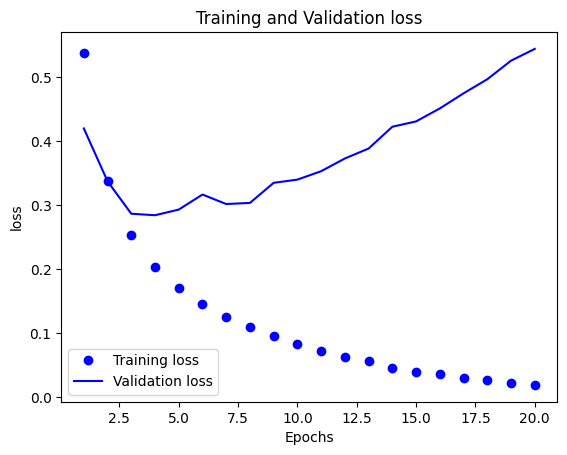

In [18]:
graf('loss','val_loss', 'b')

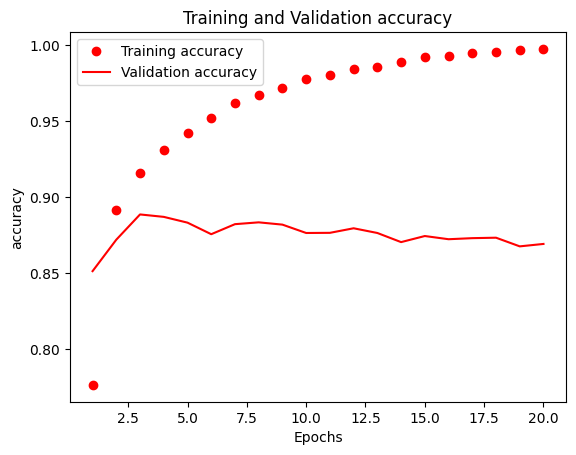

In [19]:
plt.clf()   #현재 활성화된 그림을 지우고 새로운 그림을 그릴 준비를 함
graf('accuracy','val_accuracy', 'r')

#### **모델을 처음부터 다시 훈련하기**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
# epochs: 반복횟수(한 번 돌때마다 손실을 계산하고 가중치를 업데이트)
# batch_size: 훈련시 몇 개를 한 묶음으로 해서 학습시킬 건지

print('-----------------------------------------------------------------------------------------------')
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 10ms/step - loss: 0.4653 - accuracy: 0.8090
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2744 - accuracy: 0.9037
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2137 - accuracy: 0.9241
Epoch 4/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1813 - accuracy: 0.9354
-----------------------------------------------------------------------------------------------
782/782 [==============================] - 2s 2ms/step - loss: 0.2938 - accuracy: 0.8825


## **뉴스 기사 분류: 다중분류 문제**
- #### **로이터 데이터셋**

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [22]:
print(len(train_data))
print(len(test_data))

8982
2246


In [23]:
print(train_data[10][:10])
print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]
3


- #### **모델 구성**

In [24]:
# 모델 정의하기
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')    #각 클래스별 확률로 나옴 (이진분류일땐 sigmoid 사용)
])

In [25]:
# 모델 컴파일 하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',   #이진분류에서 출력이 확률로 해석될 때 사용(손실 함수)
              metrics=['accuracy']   )

- #### **데이터 준비**

In [26]:
# 데이터 인코딩 하기
x_train = vectorize_sequences(train_data)   #위에 사용자 정의 함수 있음
x_test = vectorize_sequences(test_data)

In [27]:
# 레이블 인코딩 하기(원핫 인코딩)
def one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = one_hot(train_labels)
y_test = one_hot(test_labels)

In [28]:
# 케라스 내장함수(주어진 레이블을 원핫 인코딩)
# 위와 다른 방식으로 원핫 인코딩 수행(동일한 결과)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

- #### **훈련 검증**

In [29]:
x_val = x_train[:1000]   #검증셋(1000개)
y_val = y_train[:1000]

partial_x_train = x_train[1000:]   #학습셋(1000개 제외 나머지)
partial_y_train = y_train[1000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
16/16 [==============================] - 2s 28ms/step - loss: 0.4798 - accuracy: 0.0061 - val_loss: 0.2469 - val_accuracy: 0.0040
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 0.1690 - accuracy: 0.1947 - val_loss: 0.1170 - val_accuracy: 0.3560
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 0.0988 - accuracy: 0.4008 - val_loss: 0.0860 - val_accuracy: 0.4660
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.0781 - accuracy: 0.4721 - val_loss: 0.0725 - val_accuracy: 0.4970
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.0680 - accuracy: 0.5056 - val_loss: 0.0649 - val_accuracy: 0.5080
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.0617 - accuracy: 0.5335 - val_loss: 0.0594 - val_accuracy: 0.5630
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.0574 - accuracy: 0.5762 - val_loss: 0.0559 - val_accuracy: 0.5980
Epoch 8/20
16

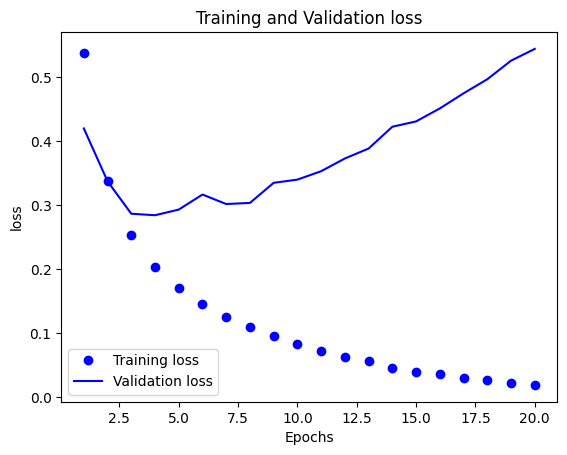

In [31]:
graf('loss','val_loss', 'b')

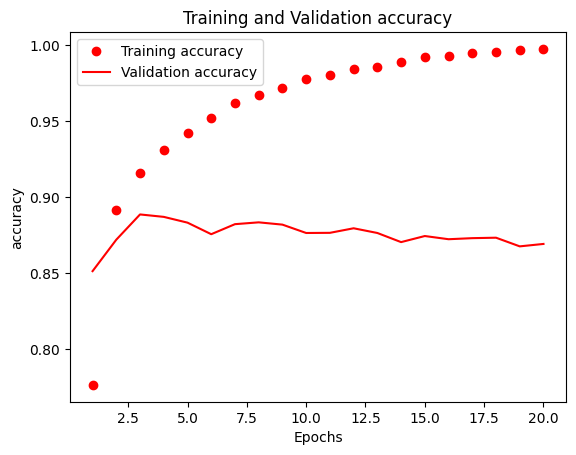

In [32]:
plt.clf()   #현재 활성화된 그림을 지우고 새로운 그림을 그릴 준비를 함
graf('accuracy','val_accuracy', 'r')

- #### **모델 처음부터 다시 돌려보기**

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=9, batch_size=512)
print('-----------------------------------------------------------------------------------------------')
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 11ms/step - loss: 0.4803 - accuracy: 0.0063
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 0.1582 - accuracy: 0.2802
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 0.0926 - accuracy: 0.5127
Epoch 4/9
18/18 [==============================] - 0s 11ms/step - loss: 0.0758 - accuracy: 0.5282
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.0672 - accuracy: 0.5366
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.0611 - accuracy: 0.5603
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.0567 - accuracy: 0.5846
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.0533 - accuracy: 0.6081
Epoch 9/9
18/18 [==============================] - 0s 10ms/step - loss: 0.0507 - accuracy: 0.6255
-----------------------------------------------------------------------------------------------
71/71 [===============

In [34]:
results   #손실, 정확도

[0.05113249272108078, 0.6335707902908325]

- #### **랜덤한 분류기를 사용해 예측해보기**

In [35]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)

hist_array = np.array(test_labels) == np.array(test_labels_copy)
hist_array.mean()

0.1918967052537845

#### **새로운 데이터로 예측하기**

In [36]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [37]:
print(predictions[0].shape)    #항목의 길이
print(np.sum(predictions[0]))    #확률 분포 -> 모두 더하면 1이 됨
print(np.argmax(predictions[0]))    #가장 큰 값이 예측 클래스가 됨(가장 확률이 높은 클래스)

(46,)
0.9999999
3


#### **레이블과 손실을 다루는 방법**

In [38]:
# 레이블을 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **충분히 큰 공간을 두어야 하는 이유**
- **정보 병목이 있는 모델**

In [40]:
# 정보 병목: 모델 구조나 데이터 처리 과정에서 정보의 손실이 발생하여 성능이 저하되는 현상
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),    #해당 층의 용량이 너무 제한적이라, 정보를 효율적으로 전달하고 유지x
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs=20, batch_size=128,
          validation_data=(x_val, y_val))

results = model.evaluate(x_val, y_val)
print('\n',results)   #손실, 정확도

Epoch 1/20
63/63 [==============================] - 2s 8ms/step - loss: 3.2056 - accuracy: 0.1247 - val_loss: 2.4818 - val_accuracy: 0.5420
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9424 - accuracy: 0.5688 - val_loss: 1.6774 - val_accuracy: 0.5800
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5019 - accuracy: 0.6051 - val_loss: 1.5179 - val_accuracy: 0.6060
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3462 - accuracy: 0.6334 - val_loss: 1.4525 - val_accuracy: 0.6100
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2194 - accuracy: 0.6764 - val_loss: 1.3754 - val_accuracy: 0.6800
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0895 - accuracy: 0.7359 - val_loss: 1.3505 - val_accuracy: 0.6860
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9874 - accuracy: 0.7588 - val_loss: 1.3178 - val_accuracy: 0.6880
Epoch 8/20
63/63 [==

- 뉴런은 입력 데이터에서 학습된 가중치와 편향을 사용하여 출력을 계산합니다. units는 해당 레이어의 출력 차원 또는 뉴런의 개수를 결정
- 가중치의 수는 이전 레이어의 units 수와 현재 레이어의 units 수에 따라 결정됩니다. 이전 레이어의 각 뉴런과 현재 레이어의 각 뉴런 사이에 가중치가 존재하므로, 가중치의 수는 이 연결의 수와 동일
- units 수는 레이어의 출력 차원 또는 뉴런의 개수를 나타내고, 가중치의 수는 모델의 구조와 연결에 따라 결정됩니다. 가중치의 수 는 units 수와 일치하지 않을 수 있습니다.

- 유닛: layers.Dense(64, activation='relu')에서 '64'부분. 입력되는 x


## **주택가격 예측: 회귀문제**

### **보스턴 주택 가격 데이터셋**
- **보스턴 주택 데이터셋 로드하기**

In [41]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [42]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [44]:
print(train_targets[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


- **데이터 준비**<br>
데이터 정규화하기. 평균0, 표준편차1(표준화)

In [45]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

- **모델 정의**

In [47]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)    # 회귀는 출력값이 1개(예측하려는 확률)뿐이므로 마지막 유닛=1
  ])
# 2진 분류에서도 출력이 1개 (0이냐 1이냐 결정되서 나옴)
# 단, 멀티분류에서는 각각의 선택지에 대한 확률이 나오므로 출력값이 여러개

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

- **K겹 검증을 사용한 훈련검증**

In [50]:
k=4
num_val_samples = len(train_data) // k
#한 개의 폴드에 사용할 데이터 개수 (폴드 개수만큼 데이터도 n등분 한 거)
epoch = 100
all_scores = []   #결과 mae 담을 거임

for i in range(k):
  print(f'{i}번째 폴드 처리중')

  # 현재 폴드에서 사용할 데이터 범위
  val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(   #현재 폴드를 제외한 나머지 데이터 연결
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],  #연결하려는 데이터 리스트
      axis=0)   #수직 방향
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],
      axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=epoch, batch_size=16, verbose=0)

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

0번째 폴드 처리중
1번째 폴드 처리중
2번째 폴드 처리중
3번째 폴드 처리중


In [51]:
all_scores    # 4개 폴드의 mae

[2.0417537689208984, 2.337419271469116, 2.527602434158325, 2.4561777114868164]

- **각 폴드의 검증점수 저장하기**

In [54]:
k=4
num_val_samples = len(train_data) // k
epoch = 500
all_mae_history = []

for i in range(k):
  print(f'{i}번째 폴드 처리중')

  val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],
      axis=0)   #수직 방향
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],
      axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                    validation_data = (val_data, val_targets),
                    epochs=epoch, batch_size=16, verbose=0)

  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

0번째 폴드 처리중
1번째 폴드 처리중
2번째 폴드 처리중
3번째 폴드 처리중


In [60]:
print(all_mae_history[0])

[18.654891967773438, 15.265299797058105, 10.977643013000488, 6.639540672302246, 4.600888729095459, 3.9282279014587402, 3.51503586769104, 3.2606148719787598, 3.1169164180755615, 2.946772813796997, 3.044049024581909, 2.7854480743408203, 2.8571293354034424, 2.7316219806671143, 2.5501999855041504, 2.5020148754119873, 2.442187547683716, 2.3536782264709473, 2.416411876678467, 2.352721691131592, 2.2761194705963135, 2.192333936691284, 2.2232494354248047, 2.184195041656494, 2.2706427574157715, 2.1155471801757812, 2.0992116928100586, 2.0932564735412598, 2.16662859916687, 2.174933910369873, 2.05367374420166, 2.1416828632354736, 2.036350727081299, 1.9897230863571167, 2.158975839614868, 2.0902702808380127, 2.0242724418640137, 1.9477497339248657, 1.9784431457519531, 1.9581376314163208, 1.9674118757247925, 2.10074782371521, 2.034897804260254, 1.9803217649459839, 1.9384123086929321, 1.902754545211792, 1.9248747825622559, 1.915879249572754, 1.941930890083313, 2.0023136138916016, 1.8539613485336304, 1.9

- **K겹 검증 점수 평균을 기록하기**

In [61]:
average_mae_history = [np.mean([j[i] for j in all_mae_history]) for i in range(epoch)]
print(average_mae_history[0])

19.424761295318604


- **검증 점수 그래프 그리기**

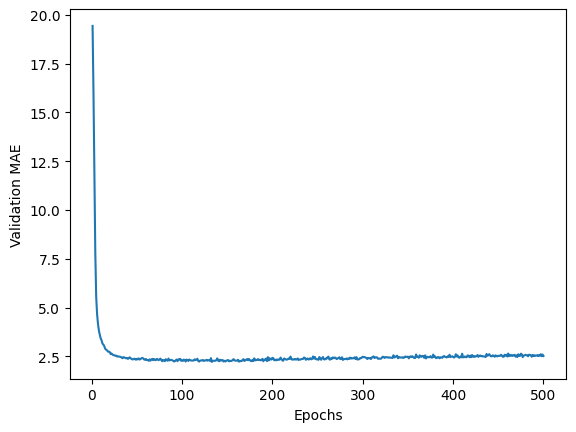

In [62]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

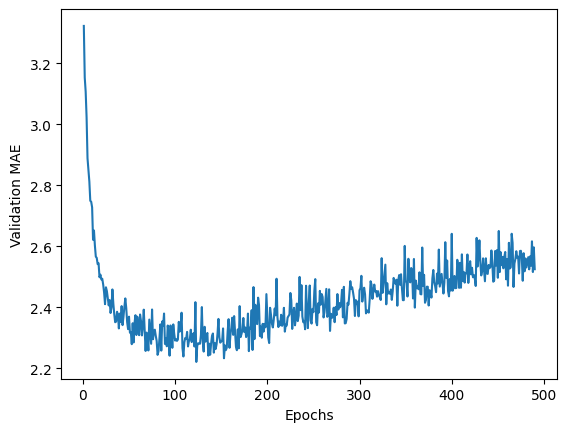

In [63]:
# 처음 10개 제외하고 그래프 그리기 (스케일 차이가 심해서 나머지 부분이 안 보임)
plt.plot(range(1, len(average_mae_history[10:])+1), average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- **최종 모델 훈련하기**

In [73]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 14.8708 - mae: 2.4994


In [75]:
print(test_mse_score)
print(test_mae_score)

14.870796203613281
2.4994354248046875


- **새로운 데이터에 대해 예측하기**

In [76]:
predictions = model.predict(test_data)
predictions[1]

4/4 [==============================] - 0s 2ms/step


array([18.97533], dtype=float32)